In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load the dataset
uber_data = pd.read_csv('rideshare_kaggle.csv.zip')

In [3]:

# Basic Information and Overview of the Dataset
print("Shape of the dataset:", uber_data.shape)
print("Columns in the dataset:\n", uber_data.columns)
print("Data types of each column:\n", uber_data.dtypes)


Shape of the dataset: (693071, 57)
Columns in the dataset:
 Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperature

In [4]:

# Preview the dataset
print("\nFirst 5 rows of the dataset:\n", uber_data.head())



First 5 rows of the dataset:
                                      id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  tempera

In [5]:

# Check for missing values
missing_values = uber_data.isnull().sum()
print("\nMissing values in each column:\n", missing_values)



Missing values in each column:
 id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windG

In [6]:
# Statistical Summary of the Dataset
print("\nStatistical summary of the dataset:\n", uber_data.describe())



Statistical summary of the dataset:
           timestamp           hour            day          month  \
count  6.930710e+05  693071.000000  693071.000000  693071.000000   
mean   1.544046e+09      11.619137      17.794365      11.586684   
std    6.891925e+05       6.948114       9.982286       0.492429   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  637976.000000  693071.000000     693071.000000  693071.000000   
mean       16.545125       2.189430          1.013870      42.338172   
std         9.324359       1.138937          0.091641       0.047840   
min         2.500000       0.020000          1.000000      42

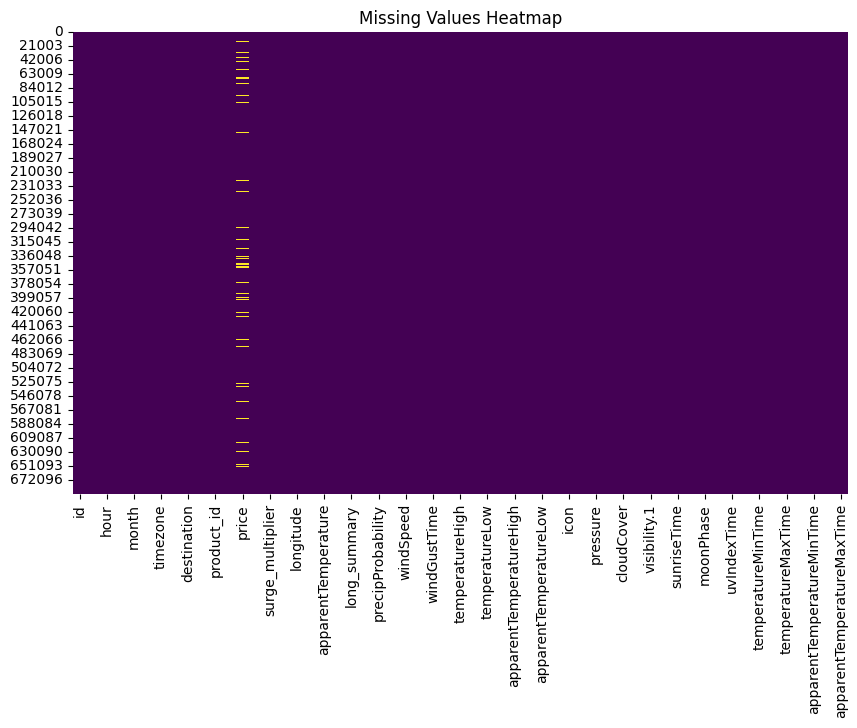

In [7]:

# Data Types and Null Values Visualization
plt.figure(figsize=(10,6))
sns.heatmap(uber_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


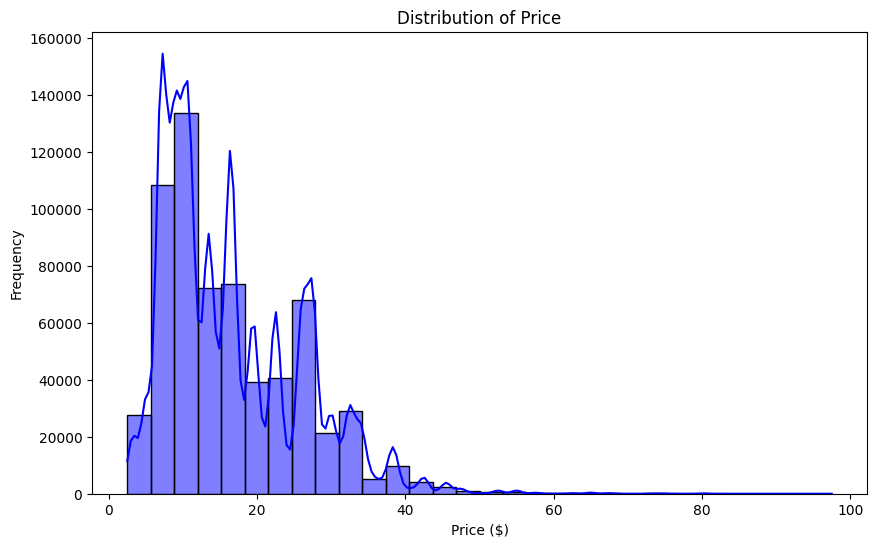

In [8]:

# Univariate Analysis: Distribution of Price
plt.figure(figsize=(10,6))
sns.histplot(uber_data['price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


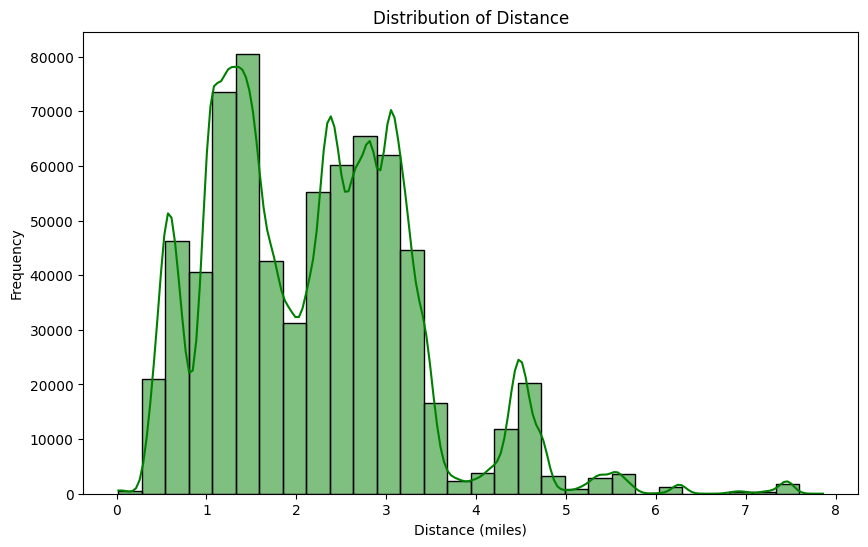

In [9]:

# Univariate Analysis: Distribution of Distance
plt.figure(figsize=(10,6))
sns.histplot(uber_data['distance'], kde=True, bins=30, color='green')
plt.title('Distribution of Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()


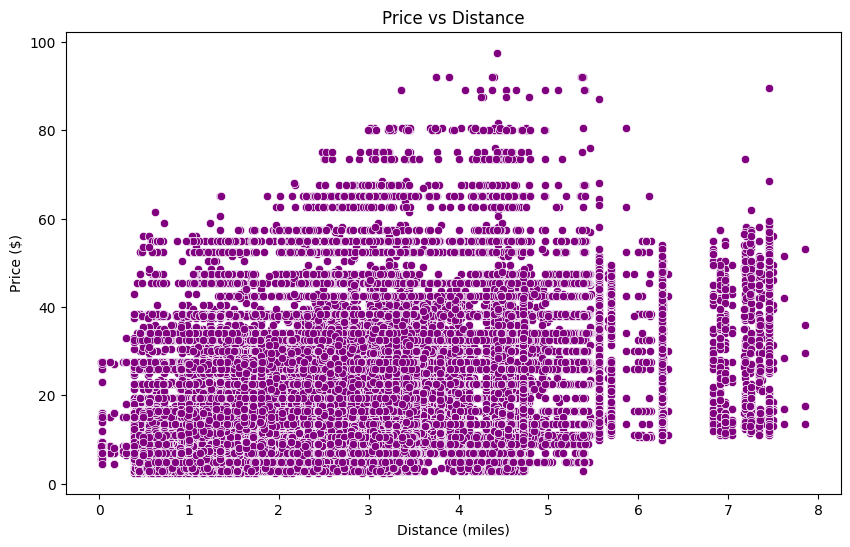

In [10]:
# Bivariate Analysis: Price vs Distance
plt.figure(figsize=(10,6))
sns.scatterplot(x='distance', y='price', data=uber_data, color='purple')
plt.title('Price vs Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Price ($)')
plt.show()

# Bivariate Analysis: Day of Week vs Price (if there is a 'day_of_week' column)
if 'day_of_week' in uber_data.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='day_of_week', y='price', data=uber_data)
    plt.title('Price Distribution by Day of Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Price ($)')
    plt.show()

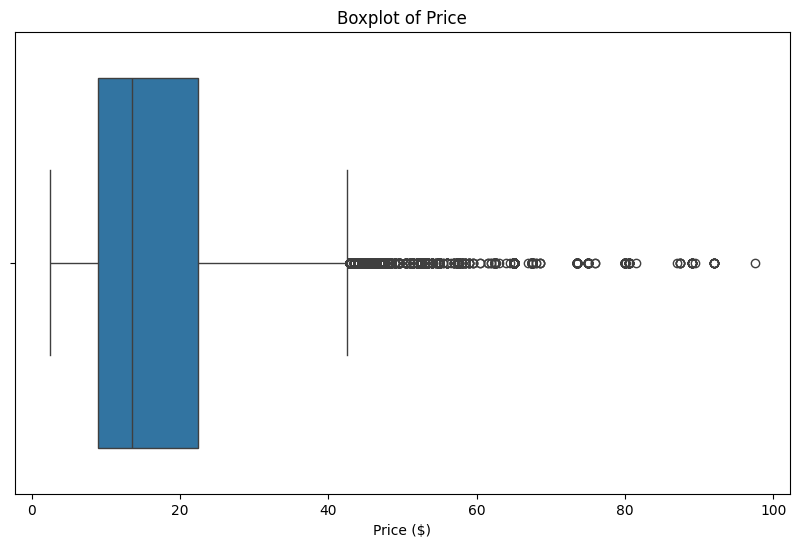

In [11]:

# Detecting Outliers using Boxplot for Price
plt.figure(figsize=(10,6))
sns.boxplot(x=uber_data['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price ($)')
plt.show()


/var/folders/tc/9srvxb_11h5bpdgnjy16lbqr0000gn/T/ipykernel_71942/1786094344.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_data['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Handle divisions by zero or invalid values



Number of outliers in the price column based on Z-Score: 5114


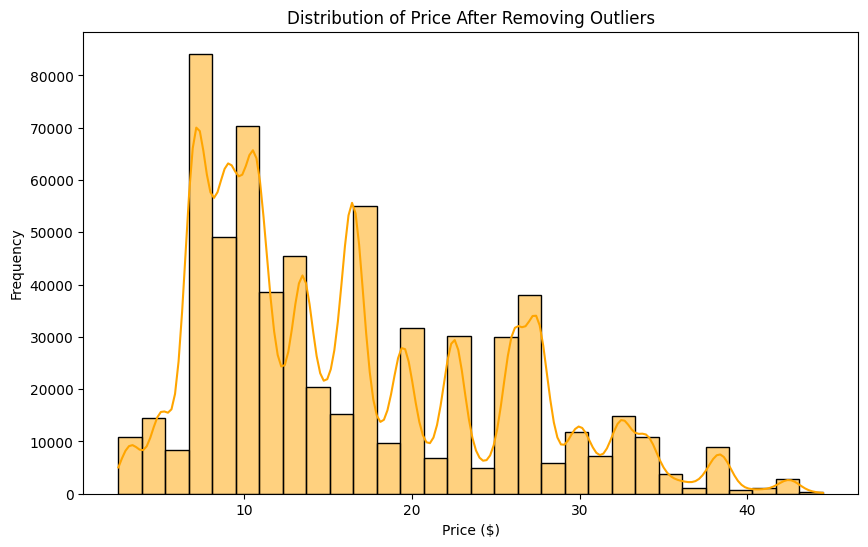

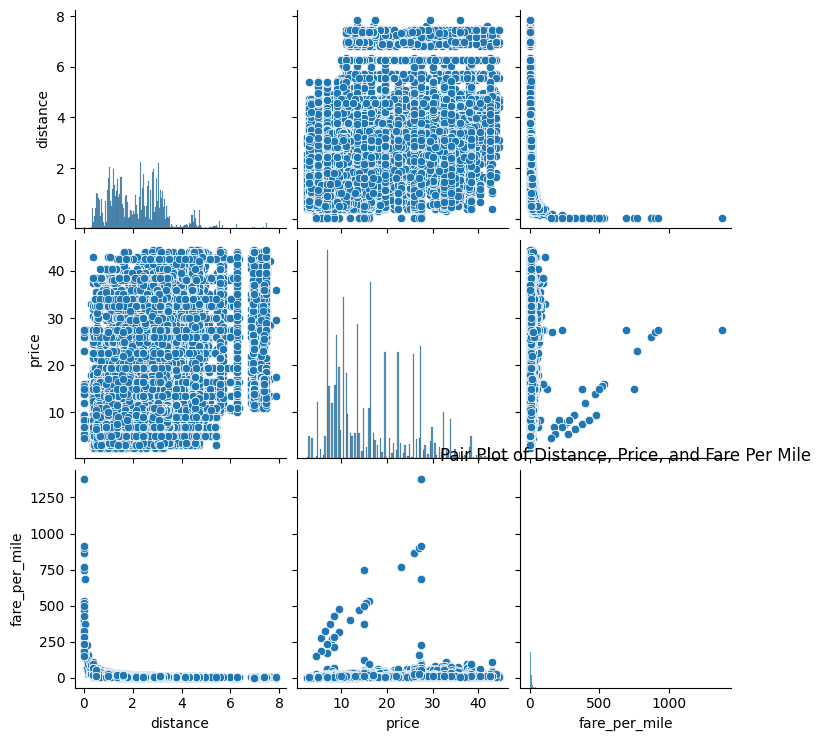

In [12]:
# Create 'fare_per_mile' before detecting outliers
uber_data['fare_per_mile'] = uber_data['price'] / uber_data['distance']
uber_data['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Handle divisions by zero or invalid values
uber_data.dropna(subset=['fare_per_mile'], inplace=True)  # Remove rows with NaN values in 'fare_per_mile'

# Detecting Outliers using Z-Score for Price
uber_data['z_score_price'] = np.abs(stats.zscore(uber_data['price']))
outliers = uber_data[uber_data['z_score_price'] > 3]
print(f"\nNumber of outliers in the price column based on Z-Score: {len(outliers)}")

# Handling Outliers by Removing Them
uber_data_no_outliers = uber_data[uber_data['z_score_price'] <= 3]

# Visualizing Price After Removing Outliers
plt.figure(figsize=(10,6))
sns.histplot(uber_data_no_outliers['price'], kde=True, bins=30, color='orange')
plt.title('Distribution of Price After Removing Outliers')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Multivariate Analysis: Pair Plot of Numerical Features (distance, price, fare_per_mile)
sns.pairplot(uber_data_no_outliers[['distance', 'price', 'fare_per_mile']])
plt.title('Pair Plot of Distance, Price, and Fare Per Mile')
plt.show()

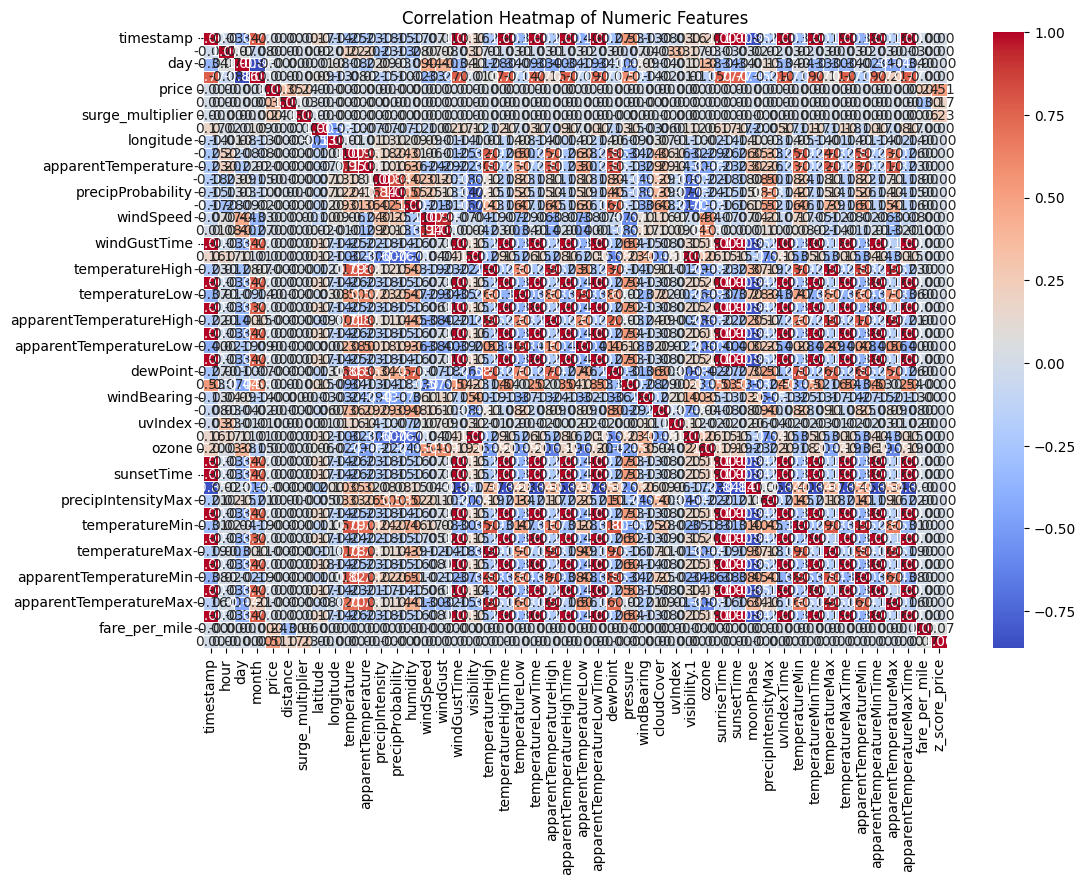

In [13]:
# Ensure all columns are numeric and drop non-numeric columns
numeric_columns = uber_data.select_dtypes(include=[np.number])

# Check for missing values in numeric columns
numeric_columns = numeric_columns.dropna()

# Generate the Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [14]:

# Check for multicollinearity using VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [15]:
X = uber_data_no_outliers[['distance', 'fare_per_mile']]  # Include other relevant numeric columns if needed
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nVariance Inflation Factor (VIF):\n", vif_data)


# Categorical Analysis (if applicable)
# Analyzing categorical data like 'ride_type', 'payment_type' (if present)
if 'ride_type' in uber_data.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x='ride_type', data=uber_data)
    plt.title('Ride Type Distribution')
    plt.xlabel('Ride Type')
    plt.ylabel('Count')
    plt.show()
    
    
# Additional Bivariate Analysis: Categorical Variable vs Numeric Variable
# Analyzing how a categorical variable affects a numerical one, like ride type vs price
if 'ride_type' in uber_data.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='ride_type', y='price', data=uber_data)
    plt.title('Price by Ride Type')
    plt.xlabel('Ride Type')
    plt.ylabel('Price ($)')
    plt.show()



Variance Inflation Factor (VIF):
          Feature       VIF
0       distance  1.186878
1  fare_per_mile  1.186878


In [16]:

# Multivariate Analysis: Clustering Analysis for Distance and Price
from sklearn.cluster import KMeans

X = uber_data_no_outliers[['distance', 'price']]
kmeans = KMeans(n_clusters=3, random_state=42)
uber_data_no_outliers['cluster'] = kmeans.fit_predict(X)


/var/folders/tc/9srvxb_11h5bpdgnjy16lbqr0000gn/T/ipykernel_71942/188303131.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data_no_outliers['cluster'] = kmeans.fit_predict(X)


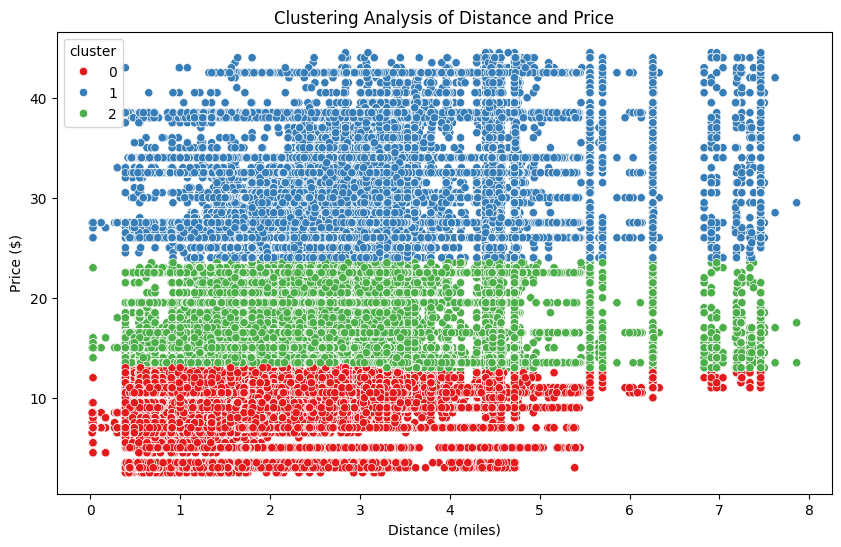

In [17]:

# Visualizing Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='distance', y='price', hue='cluster', data=uber_data_no_outliers, palette='Set1')
plt.title('Clustering Analysis of Distance and Price')
plt.xlabel('Distance (miles)')
plt.ylabel('Price ($)')
plt.show()

# Further Investigation: Time of Day Analysis (if 'time_of_day' column is present)
if 'time_of_day' in uber_data.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='time_of_day', y='price', data=uber_data)
    plt.title('Price Distribution by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('Price ($)')
    plt.show()

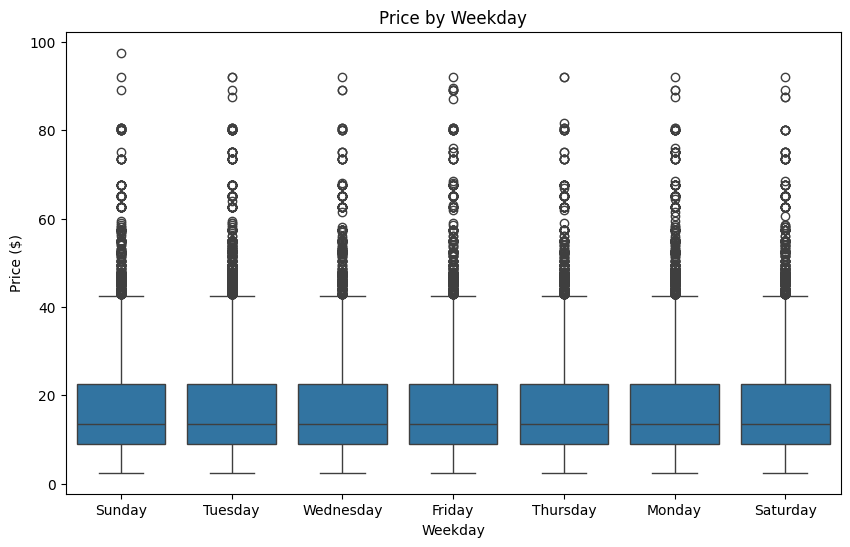

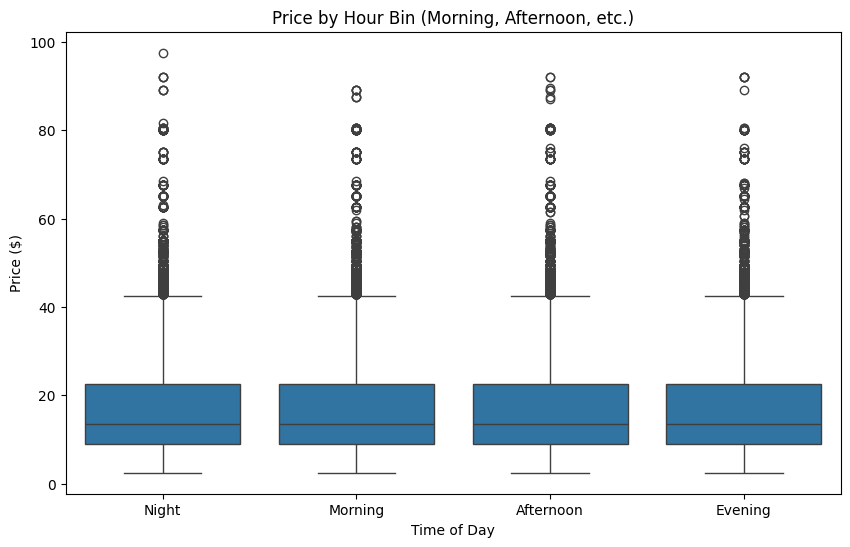

In [18]:
# Converting timestamp to datetime format
uber_data['datetime'] = pd.to_datetime(uber_data['datetime'])

# Extracting more datetime features
uber_data['weekday'] = uber_data['datetime'].dt.day_name()
uber_data['hour_bin'] = pd.cut(uber_data['hour'], bins=[0, 6, 12, 18, 24], 
                               labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Bivariate analysis: Price by weekday
plt.figure(figsize=(10,6))
sns.boxplot(x='weekday', y='price', data=uber_data)
plt.title('Price by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Price ($)')
plt.show()

# Bivariate analysis: Price by hour_bin
plt.figure(figsize=(10,6))
sns.boxplot(x='hour_bin', y='price', data=uber_data)
plt.title('Price by Hour Bin (Morning, Afternoon, etc.)')
plt.xlabel('Time of Day')
plt.ylabel('Price ($)')
plt.show()

In [19]:
# Impute missing prices based on the median price for that specific hour or distance
uber_data['price'] = uber_data.groupby(['hour', 'distance'])['price'].transform(lambda x: x.fillna(x.median()))
print("\nMissing values after imputation:\n", uber_data.isnull().sum())


Missing values after imputation:
 id                                0
timestamp                         0
hour                              0
day                               0
month                             0
                              ...  
apparentTemperatureMaxTime        0
fare_per_mile                     0
z_score_price                     0
weekday                           0
hour_bin                      29872
Length: 61, dtype: int64


/var/folders/tc/9srvxb_11h5bpdgnjy16lbqr0000gn/T/ipykernel_71942/4052162330.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data_no_outliers['lof_outlier'] = lof.fit_predict(uber_data_no_outliers[['distance', 'price']])


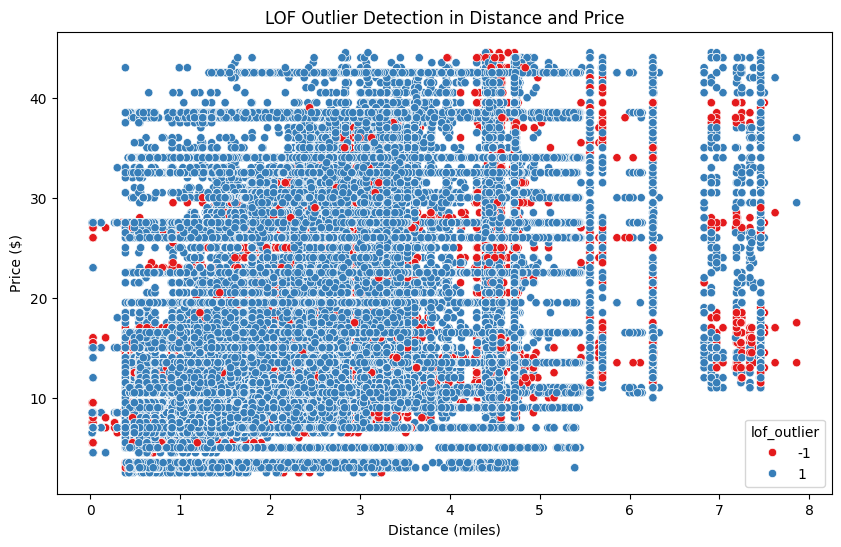

In [20]:
from sklearn.neighbors import LocalOutlierFactor

# Using Local Outlier Factor (LOF) for outlier detection
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
uber_data_no_outliers['lof_outlier'] = lof.fit_predict(uber_data_no_outliers[['distance', 'price']])

# Visualizing LOF Outliers
plt.figure(figsize=(10,6))
sns.scatterplot(x='distance', y='price', hue='lof_outlier', data=uber_data_no_outliers, palette='Set1')
plt.title('LOF Outlier Detection in Distance and Price')
plt.xlabel('Distance (miles)')
plt.ylabel('Price ($)')
plt.show()

Geospatial Analysis:
	•	Visualize ride data on a map to identify popular routes or areas
	•	Analyze the relationship between location and price/demand

In [ ]:
import folium

# Create a map centered on the mean latitude and longitude
m = folium.Map(location=[uber_data['latitude'].mean(), uber_data['longitude'].mean()], zoom_start=12)

# Add markers for each ride
for idx, row in uber_data.sample(1000).iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']], 
                        radius=2, 
                        popup=f"Price: ${row['price']}, Distance: {row['distance']} miles").add_to(m)

m.save("ride_map.html")


In [22]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"  # This will open the plot in your default web browser

fig = px.scatter(uber_data, x='distance', y='price', color='cab_type', 
                 hover_data=['surge_multiplier', 'temperature'],
                 title='Price vs Distance by Cab Type')
fig.show()


/opt/homebrew/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
uber_data = pd.read_csv('rideshare_kaggle.csv.zip')

# Data Preprocessing
# Handle missing values
uber_data['price'] = uber_data.groupby(['hour', 'distance'])['price'].transform(lambda x: x.fillna(x.median()))

# Drop rows with missing values in critical columns
uber_data.dropna(subset=['price', 'distance'], inplace=True)

# Feature Engineering
# Create 'fare_per_mile' feature
uber_data['fare_per_mile'] = uber_data['price'] / uber_data['distance']
uber_data['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)
uber_data.dropna(subset=['fare_per_mile'], inplace=True)

# Select features and target variable
features = ['distance', 'fare_per_mile', 'hour', 'cab_type']
if 'day_of_week' in uber_data.columns:
    features.append('day_of_week')
target = 'price'

# Split the data into training and testing sets
X = uber_data[features]
y = uber_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical data
numerical_features = ['distance', 'fare_per_mile', 'hour']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_features = ['cab_type']
if 'day_of_week' in uber_data.columns:
    categorical_features.append('day_of_week')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
forest_model = RandomForestRegressor(random_state=42)

# Create and evaluate the pipeline
forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', forest_model)])

# Train the model
forest_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_train_forest = forest_pipeline.predict(X_train)
y_pred_test_forest = forest_pipeline.predict(X_test)

# Evaluate the model
train_rmse_forest = np.sqrt(mean_squared_error(y_train, y_pred_train_forest))
test_rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_test_forest))
train_r2_forest = r2_score(y_train, y_pred_train_forest)
test_r2_forest = r2_score(y_test, y_pred_test_forest)

print(f'Random Forest Regressor - Training RMSE: {train_rmse_forest}')
print(f'Random Forest Regressor - Testing RMSE: {test_rmse_forest}')
print(f'Random Forest Regressor - Training R2: {train_r2_forest}')
print(f'Random Forest Regressor - Testing R2: {test_r2_forest}')

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean

Random Forest Regressor - Training RMSE: 0.029477413696610024
Random Forest Regressor - Testing RMSE: 0.08019607633020166
Random Forest Regressor - Training R2: 0.9999893264458272
Random Forest Regressor - Testing R2: 0.999920984986219


In [25]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

# Define the model
linear_model = LinearRegression()

# Create and evaluate the pipeline
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', linear_model)])

# Train the model
linear_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_train_linear = linear_pipeline.predict(X_train)
y_pred_test_linear = linear_pipeline.predict(X_test)

# Evaluate the model
train_rmse_linear = np.sqrt(mean_squared_error(y_train, y_pred_train_linear))
test_rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_test_linear))
train_r2_linear = r2_score(y_train, y_pred_train_linear)
test_r2_linear = r2_score(y_test, y_pred_test_linear)

print(f'Linear Regression - Training RMSE: {train_rmse_linear}')
print(f'Linear Regression - Testing RMSE: {test_rmse_linear}')
print(f'Linear Regression - Training R2: {train_r2_linear}')
print(f'Linear Regression - Testing R2: {test_r2_linear}')

Linear Regression - Training RMSE: 7.777224707263613
Linear Regression - Testing RMSE: 7.773411288198594
Linear Regression - Training R2: 0.2570157628954496
Linear Regression - Testing R2: 0.2576193006021845


In [26]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

# Define the model
tree_model = DecisionTreeRegressor(random_state=42)

# Create and evaluate the pipeline
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', tree_model)])

# Train the model
tree_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_train_tree = tree_pipeline.predict(X_train)
y_pred_test_tree = tree_pipeline.predict(X_test)

# Evaluate the model
train_rmse_tree = np.sqrt(mean_squared_error(y_train, y_pred_train_tree))
test_rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_test_tree))
train_r2_tree = r2_score(y_train, y_pred_train_tree)
test_r2_tree = r2_score(y_test, y_pred_test_tree)

print(f'Decision Tree Regressor - Training RMSE: {train_rmse_tree}')
print(f'Decision Tree Regressor - Testing RMSE: {test_rmse_tree}')
print(f'Decision Tree Regressor - Training R2: {train_r2_tree}')
print(f'Decision Tree Regressor - Testing R2: {test_r2_tree}')

Decision Tree Regressor - Training RMSE: 0.0
Decision Tree Regressor - Testing RMSE: 0.1324459791470954
Decision Tree Regressor - Training R2: 1.0
Decision Tree Regressor - Testing R2: 0.9997844832963813


In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions
param_distributions = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(forest_pipeline, param_distributions, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

# Evaluate the model
train_rmse_best = np.sqrt(mean_squared_error(y_train, y_pred_train_best))
test_rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_test_best))
train_r2_best = r2_score(y_train, y_pred_train_best)
test_r2_best = r2_score(y_test, y_pred_test_best)

print(f'Best Random Forest Regressor - Training RMSE: {train_rmse_best}')
print(f'Best Random Forest Regressor - Testing RMSE: {test_rmse_best}')
print(f'Best Random Forest Regressor - Training R2: {train_r2_best}')
print(f'Best Random Forest Regressor - Testing R2: {test_r2_best}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time= 2.4min
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time= 2.4min
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time= 2.4min
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time= 2.4min
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time= 2.4min
[CV] END model__max_depth=20, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300; total time= 3.5min
[CV] END model__max_depth=20, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300; total time= 3.5min
[CV] END model__max_depth=

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions
param_distributions = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(forest_pipeline, param_distributions, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

# Evaluate the model
train_rmse_best = np.sqrt(mean_squared_error(y_train, y_pred_train_best))
test_rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_test_best))
train_r2_best = r2_score(y_train, y_pred_train_best)
test_r2_best = r2_score(y_test, y_pred_test_best)

print(f'Best Random Forest Regressor - Training RMSE: {train_rmse_best}')
print(f'Best Random Forest Regressor - Testing RMSE: {test_rmse_best}')
print(f'Best Random Forest Regressor - Training R2: {train_r2_best}')
print(f'Best Random Forest Regressor - Testing R2: {test_r2_best}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time= 2.4min
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time= 2.4min
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time= 2.4min
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time= 2.4min
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time= 2.4min
[CV] END model__max_depth=20, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300; total time= 3.5min
[CV] END model__max_depth=20, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300; total time= 3.5min
[CV] END model__max_depth=

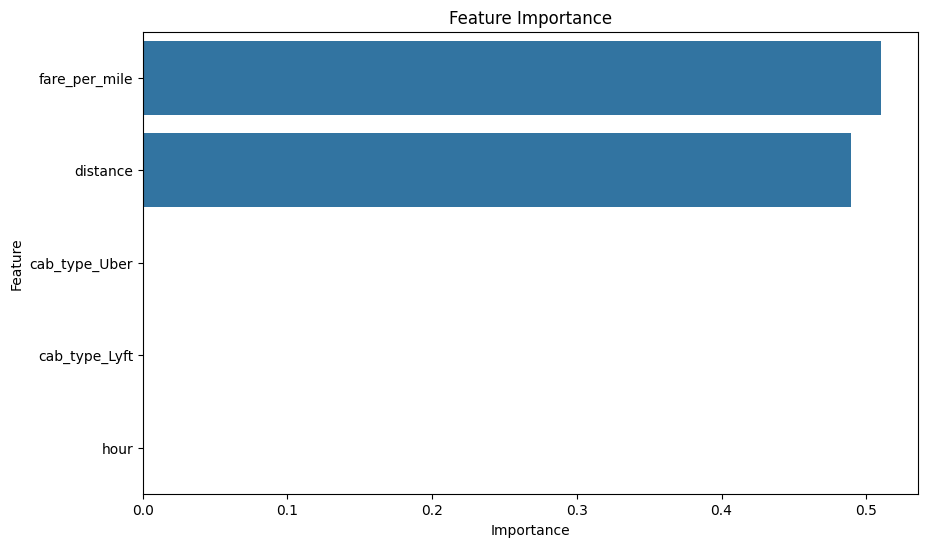

In [30]:
# Feature Importance
feature_importances = best_model.named_steps['model'].feature_importances_
feature_names = numerical_features + list(best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print(f'Cross-Validation RMSE Scores: {cv_rmse_scores}')
print(f'Mean Cross-Validation RMSE: {cv_rmse_scores.mean()}')
print(f'Standard Deviation of Cross-Validation RMSE: {cv_rmse_scores.std()}')

Cross-Validation RMSE Scores: [0.08266225 0.11029547 0.07168177 0.06707663 0.07337044]
Mean Cross-Validation RMSE: 0.08101731390880587
Standard Deviation of Cross-Validation RMSE: 0.015491194415383719


In [32]:
import joblib

# Save the model
joblib.dump(best_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']